In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [6]:
fake_news = pd.read_csv("Fake.csv")
true_news = pd.read_csv("True.csv")

In [7]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
fake_news["class"] = 0
true_news["class"] = 1

In [10]:
fake_news.shape, true_news.shape

((23481, 5), (21417, 5))

In [11]:
# Sélection de 10 articles de test manuels
fake_news_manual_testing = fake_news.tail(10)
true_news_manual_testing = true_news.tail(10)

# Suppression de ces 10 derniers articles du dataset principal
for i in range(23479, 23469, -1):
    fake_news.drop(index=i, axis=0, inplace=True)

for i in range(21415, 21405, -1):
    true_news.drop(index=i, axis=0, inplace=True)


In [12]:
fake_news.shape, true_news.shape

((23471, 5), (21407, 5))

In [13]:
fake_news_manual_testing['class'] = 0
true_news_manual_testing['class'] = 1

C:\Users\pc\AppData\Local\Temp\ipykernel_20508\4237578078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_manual_testing['class'] = 0
C:\Users\pc\AppData\Local\Temp\ipykernel_20508\4237578078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news_manual_testing['class'] = 1


In [14]:
 fake_news_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
true_news_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [16]:
data_merge = pd.concat([fake_news, true_news], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [17]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
data = data_merge.drop(['title','subject','date'],axis = 1)

In [19]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [20]:
data = data.sample(frac = 1)

In [21]:
data.head()

,text,class
6343,An ongoing demonstration taking place outside ...,0
8684,Governor Greg Abbott of Texas recently travele...,0
1308,WASHINGTON (Reuters) - President Donald Trump ...,1
4291,A tape featuring Donald Trump proudly boasting...,0
18832,BEIJING (Reuters) - China is tightening securi...,1


In [22]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [23]:
data.columns

Index(['text', 'class'], dtype='object')

In [24]:
data.head()

,text,class
0,An ongoing demonstration taking place outside ...,0
1,Governor Greg Abbott of Texas recently travele...,0
2,WASHINGTON (Reuters) - President Donald Trump ...,1
3,A tape featuring Donald Trump proudly boasting...,0
4,BEIJING (Reuters) - China is tightening securi...,1


In [36]:
def wordpot(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ", text)
    text = re.sub('https?://\S+|www\.\S+', '',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [37]:
data['text'] = data['text'].apply(wordpot)

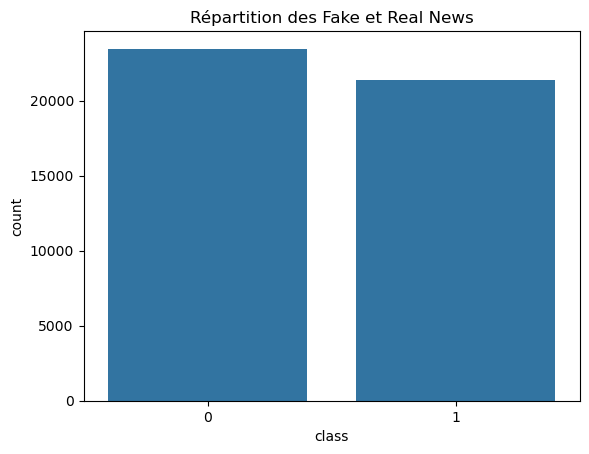

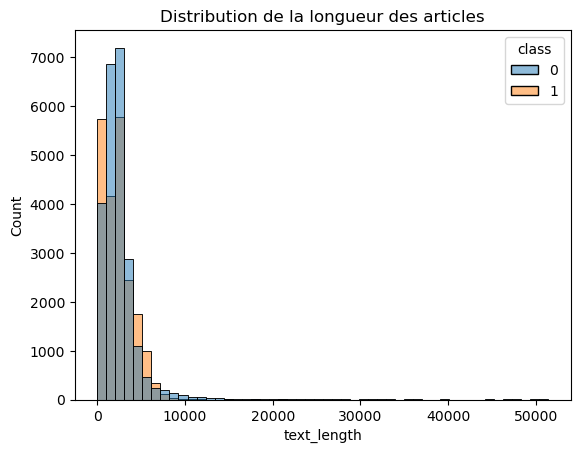

In [38]:
# === EXPLORATION VISUELLE DU DATASET ===

# Distribution des classes
sns.countplot(x='class', data=data)
plt.title('Répartition des Fake et Real News')
plt.show()

# Longueur des textes
data['text_length'] = data['text'].apply(len)
sns.histplot(data=data, x='text_length', hue='class', bins=50)
plt.title('Distribution de la longueur des articles')
plt.show()


In [39]:
data.to_csv("cleaned_fake_news.csv", index=False)

In [29]:
pip install transformers torch tqdm

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd

data = pd.read_csv(r"C:\Users\pc\Desktop\S9\Data Science\Projet\Data\cleaned_fake_news.csv")
data.head()


,text,class,text_length
0,jerusalem reuters israeli police questione...,1,1031
1,naypyitaw reuters a myanmar state run news...,1,2479
2,new york reuters russian foreign minister ...,1,537
3,in what could be the most damning information ...,0,2257
4,i was wondering if i could get a cake that sa...,0,3593


In [41]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained('bert-base-uncased')


In [42]:
def get_bert_embedding(text):
    # Tokenize text for BERT
    inputs = tokenizer(text, return_tensors='pt', truncation=True,
                       padding=True, max_length=128)
    
    # Pass tokens through BERT
    with torch.no_grad():
        outputs = bert(**inputs)
    
    # Mean pooling of the token embeddings
    emb = outputs.last_hidden_state.mean(dim=1).squeeze()
    return emb.numpy()


In [43]:
from tqdm import tqdm
import numpy as np

# Example: use 500 samples to start
subset = data.sample(500, random_state=42)

embeddings = []
for text in tqdm(subset['text']):
    emb = get_bert_embedding(text)
    embeddings.append(emb)

X = np.array(embeddings)
y = subset['class'].values


100%|██████████| 500/500 [02:57<00:00,  2.82it/s]


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        50
           1       1.00      0.88      0.94        50

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100



In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc



🔹 Training Logistic Regression...
Accuracy: 0.9400
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        50
           1       1.00      0.88      0.94        50

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.94      0.94       100


🔹 Training Random Forest...
Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        50
           1       0.98      0.82      0.89        50

    accuracy                           0.90       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100


🔹 Training SVM...
Accuracy: 0.9600
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       1.00      0.92      0.96        50

    accuracy                           0.96     

In [47]:
best_model_name = max(results, key=results.get)
print(f"\n🏆 Best model: {best_model_name} with accuracy = {results[best_model_name]:.4f}")
best_model = models[best_model_name]



🏆 Best model: SVM with accuracy = 0.9600


In [48]:
import joblib
joblib.dump(best_model, "best_fake_news_model.pkl")
print(f"✅ Saved best model: {best_model_name}")


✅ Saved best model: SVM


In [49]:
# Save BERT tokenizer and model
tokenizer.save_pretrained("bert_tokenizer")
bert.save_pretrained("bert_model")

print("✅ Tokenizer and BERT model saved successfully!")


✅ Tokenizer and BERT model saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
fake_news = pd.read_csv("Fake.csv")
true_news = pd.read_csv("True.csv")
fake_news.head()
true_news.head()
fake_news["class"] = 0
true_news["class"] = 1
fake_news.shape, true_news.shape
# Sélection de 10 articles de test manuels
fake_news_manual_testing = fake_news.tail(10)
true_news_manual_testing = true_news.tail(10)

# Suppression de ces 10 derniers articles du dataset principal
for i in range(23479, 23469, -1):
    fake_news.drop(index=i, axis=0, inplace=True)

for i in range(21415, 21405, -1):
    true_news.drop(index=i, axis=0, inplace=True)
fake_news.shape, true_news.shape
fake_news_manual_testing['class'] = 0
true_news_manual_testing['class'] = 1
fake_news_manual_testing.head(10)
true_news_manual_testing.head(10)
data_merge = pd.concat([fake_news, true_news], axis = 0)
data_merge.head(10)
data_merge.columns
data = data_merge.drop(['title','subject','date'],axis = 1)
data.isnull().sum()
data = data.sample(frac = 1)
data.head()
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)
data.columns
data.head()
def wordpot(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ", text)
    text = re.sub('https?://\S+|www\.\S+', '',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*','',text)
    return text
data['text'] = data['text'].apply(wordpot)
# === EXPLORATION VISUELLE DU DATASET ===

# Distribution des classes
sns.countplot(x='class', data=data)
plt.title('Répartition des Fake et Real News')
plt.show()

# Longueur des textes
data['text_length'] = data['text'].apply(len)
sns.histplot(data=data, x='text_length', hue='class', bins=50)
plt.title('Distribution de la longueur des articles')
plt.show()
data.to_csv("cleaned_fake_news.csv", index=False)

import pandas as pd

data = pd.read_csv(r"C:\Users\pc\Desktop\S9\Data Science\Projet\Data\cleaned_fake_news.csv")
data.head()

from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    # Tokenize text for BERT
    inputs = tokenizer(text, return_tensors='pt', truncation=True,
                       padding=True, max_length=128)
    
    # Pass tokens through BERT
    with torch.no_grad():
        outputs = bert(**inputs)
    
    # Mean pooling of the token embeddings
    emb = outputs.last_hidden_state.mean(dim=1).squeeze()
    return emb.numpy()

from tqdm import tqdm
import numpy as np

# Example: use 500 samples to start
subset = data.sample(500, random_state=42)

embeddings = []
for text in tqdm(subset['text']):
    emb = get_bert_embedding(text)
    embeddings.append(emb)

X = np.array(embeddings)
y = subset['class'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc

best_model_name = max(results, key=results.get)
print(f"\n🏆 Best model: {best_model_name} with accuracy = {results[best_model_name]:.4f}")
best_model = models[best_model_name]

import joblib
joblib.dump(best_model, "best_fake_news_model.pkl")
print(f"✅ Saved best model: {best_model_name}")

# Save BERT tokenizer and model
tokenizer.save_pretrained("bert_tokenizer")
bert.save_pretrained("bert_model")

print("✅ Tokenizer and BERT model saved successfully!")
